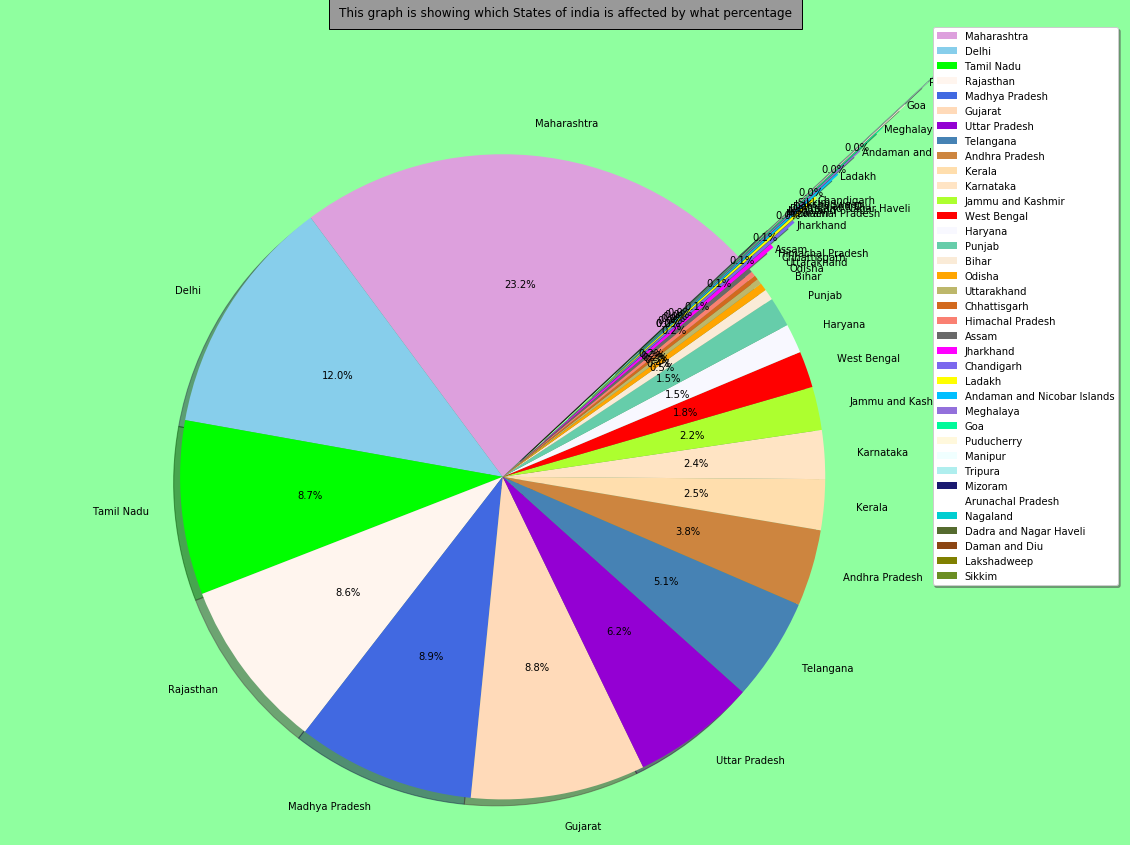

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,recovered,state,statecode,statenotes
0,12736,15723,521,0,0,0,19/04/2020 08:25:05,2466,Total,TT,
1,3072,3648,211,0,0,0,18/04/2020 21:44:05,365,Maharashtra,MH,
2,1643,1893,43,0,0,0,18/04/2020 23:05:06,207,Delhi,DL,
3,992,1372,15,0,0,0,18/04/2020 18:35:10,365,Tamil Nadu,TN,
4,1130,1351,21,0,0,0,18/04/2020 21:54:05,200,Rajasthan,RJ,
5,1206,1402,69,0,0,0,18/04/2020 23:05:08,127,Madhya Pradesh,MP,
6,1230,1376,53,0,0,0,18/04/2020 19:54:07,93,Gujarat,GJ,
7,852,974,14,0,0,0,18/04/2020 20:11:19,108,Uttar Pradesh,UP,
8,605,809,18,0,0,0,18/04/2020 21:15:08,186,Telangana,TG,
9,545,603,16,0,0,0,18/04/2020 19:15:05,42,Andhra Pradesh,AP,


In [47]:
import requests
import matplotlib.pyplot as plt
from random import sample
import matplotlib.colors as pltc
all_colors = [k for k,v in pltc.cnames.items()]
from pandas.io.json import json_normalize
URL = "https://api.covid19india.org/data.json"
data = requests.get(url=URL).json()
covid19_df = json_normalize(data['statewise'])
T='This graph is showing which States of india is affected by what percentage'
explode = (0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1,0.10,0.11,0.12,0.13,0.14,0.15)
labels=covid19_df['state'][covid19_df["state"]!='Total']

for val in range(2):
    colors = sample(all_colors, len(labels))
fig = plt.figure(figsize=(20,15))
fig.patch.set_facecolor('xkcd:mint green')

size=covid19_df['confirmed'][covid19_df["state"]!='Total']
plt.pie(size,explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',shadow=True,startangle=43)
plt.legend(labels, loc="best",shadow=True)
plt.axis('equal')
plt.title(T,bbox={'facecolor':'0.6', 'pad':10})
plt.show()
covid19_df.tail()
rawState=covid19_df['state'][covid19_df["state"]!='Total']
covid19_df

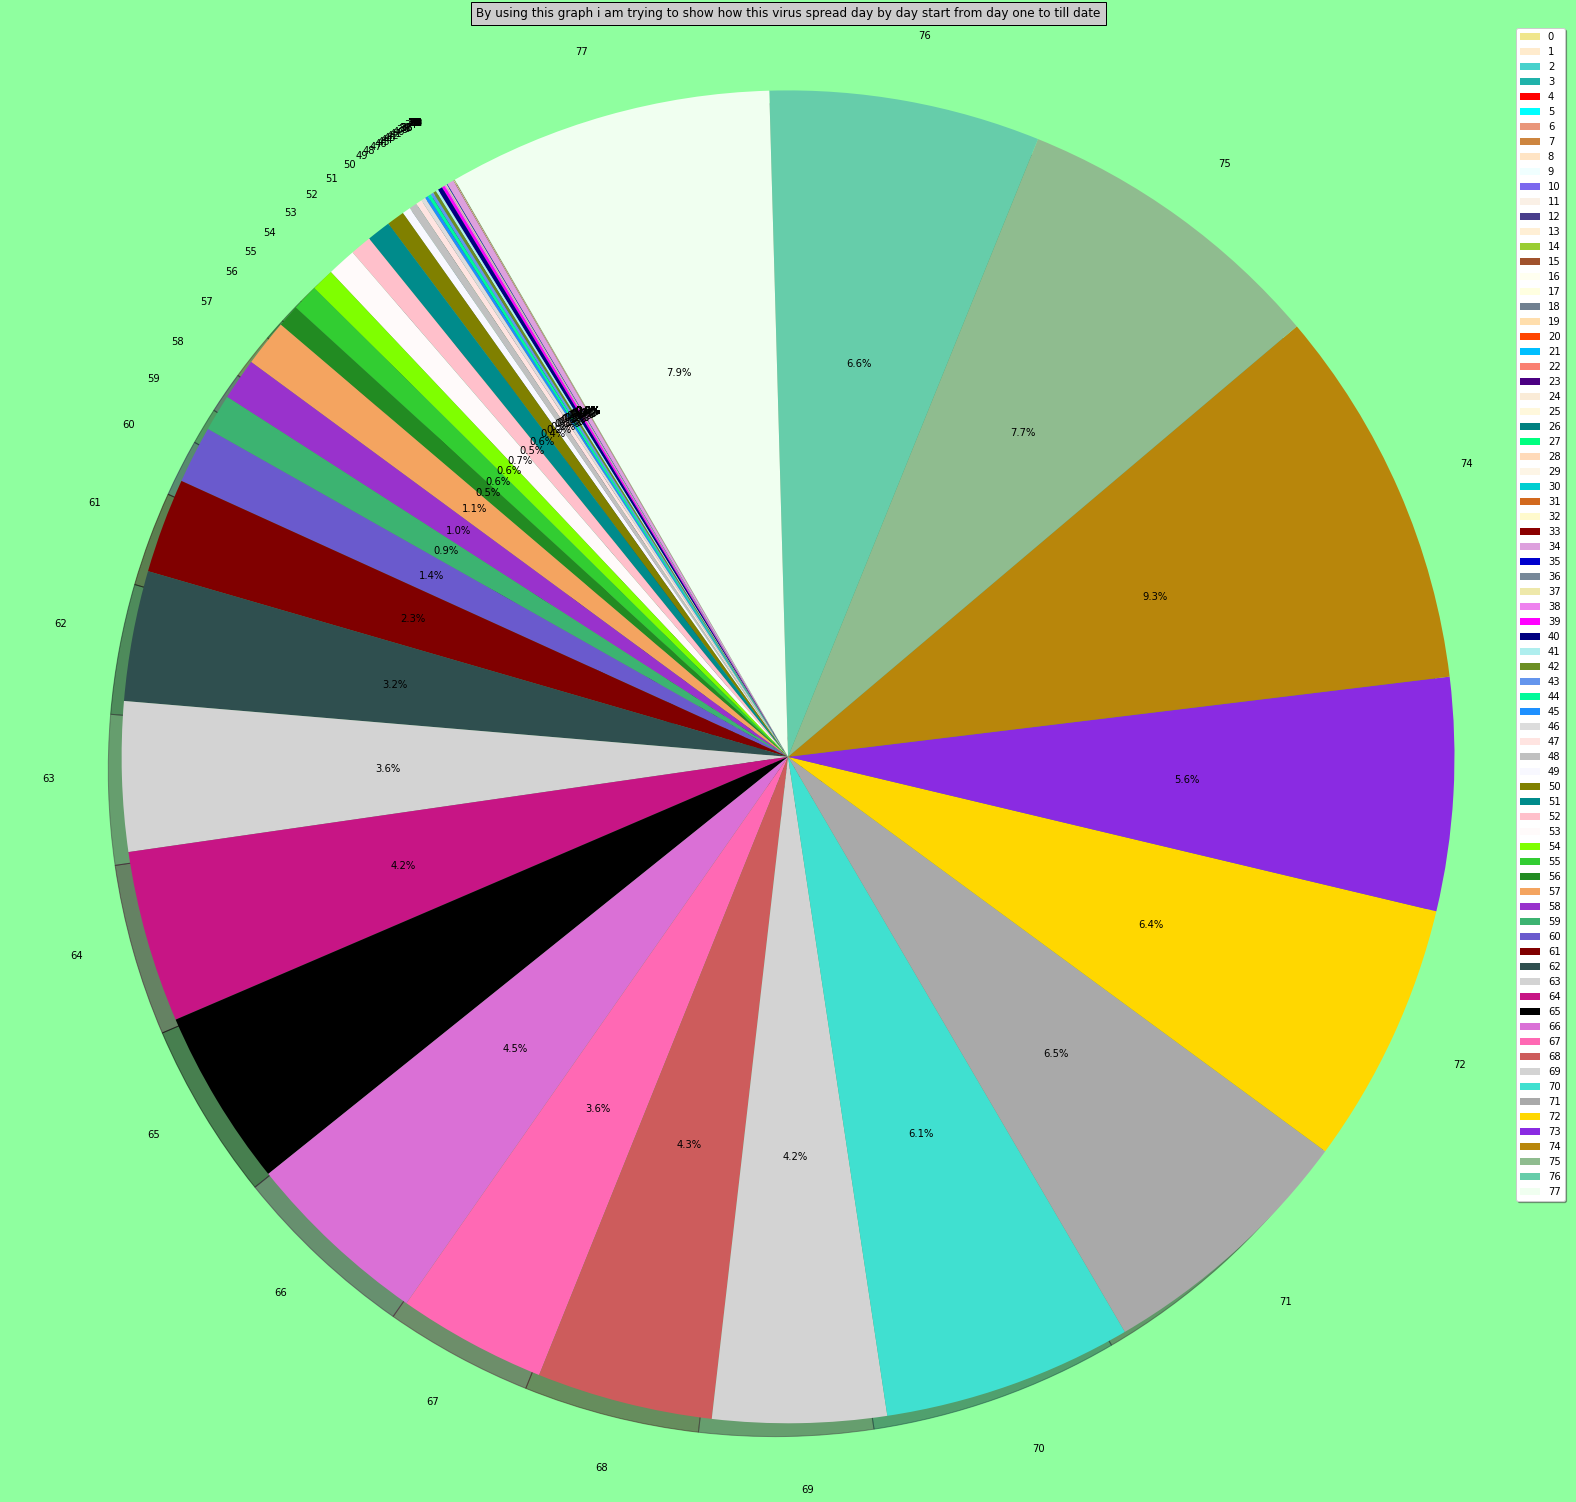

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered
73,758,42,114,12 April,9212,334,1086
74,1243,27,112,13 April,10455,361,1198
75,1035,37,167,14 April,11490,398,1365
76,882,27,144,15 April,12372,425,1509
77,1059,26,259,16 April,13431,451,1768


In [92]:
import requests
import matplotlib.pyplot as plt
from random import sample
import matplotlib.colors as pltc
all_colors = [k for k,v in pltc.cnames.items()]
from pandas.io.json import json_normalize


URL = "https://api.covid19india.org/data.json"
data = requests.get(url=URL).json()
covid19_df = json_normalize(data['cases_time_series'])

T='By using this graph i am trying to show how this virus spread day by day start from day one to till date'
labels=covid19_df.index


for val in range(2):
    colors = sample(all_colors, len(labels))
fig = plt.figure(figsize=(28,27))
fig.patch.set_facecolor('xkcd:mint green')
plt.pie(covid19_df['dailyconfirmed'], labels=labels, colors=colors,autopct='%1.1f%%',shadow=True,startangle=120)
plt.legend(labels, loc="best",shadow=True)
plt.axis('equal')
plt.title(T,bbox={'facecolor':'0.8', 'pad':5})
plt.show()

covid19_df.tail()


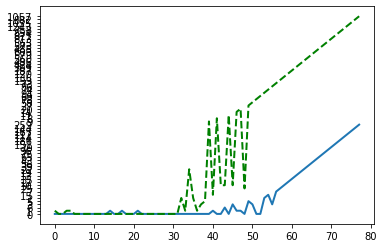

In [63]:
plt.plot(covid19_df.index,covid19_df['dailyrecovered'] , linewidth=2, markersize=12)
plt.plot(covid19_df.index, covid19_df['dailyconfirmed'], color='green', linestyle='dashed',linewidth=2, markersize=2)
plt.show()

In [103]:
#https://api.covid19india.org/raw_data.json
import requests
from pandas.io.json import json_normalize
import pandas as pd
URL = "https://api.covid19india.org/raw_data.json"
data = requests.get(url=URL).json()
covid19_df = json_normalize(data['raw_data'])

AgeBracket_20=covid19_df[['detectedstate','gender']][covid19_df['agebracket']=='20']
AgeBracket_45=covid19_df[['detectedstate','gender']][covid19_df['agebracket']=='45']
AgeBracket_24=covid19_df[['detectedstate','gender']][covid19_df['agebracket']=='24']
#print(len(AgeBracket_20)+len(AgeBracket_45)+len(AgeBracket_24))
AgeBracket_miss=covid19_df[['detectedstate','gender']][covid19_df['agebracket']=='']
AgeBracket_20['Age']=20
AgeBracket_45['Age']=45
AgeBracket_24['Age']=24

import random
MyChunk=pd.concat([AgeBracket_20, AgeBracket_45,AgeBracket_24])

g_state=MyChunk.groupby('detectedstate')

g_state.first()



#covid19_df


,gender,Age
detectedstate,,
Andhra Pradesh,M,20
Bihar,M,20
Chhattisgarh,F,24
Delhi,M,45
Gujarat,M,20
Jammu and Kashmir,M,45
Karnataka,F,20
Kerala,F,20
Madhya Pradesh,F,45


In [50]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = len(ageBracket)
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.888
